### Preperation

In [61]:
# Import all necessary packagies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Saving Results
import pickle

# Transformers and Encoders
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV

# ML Algorithms Packages
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVC
import xgboost as xgb

# Model Performance Evaluation Packages
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.utils.multiclass import unique_labels

# Feature Importance
import shap

In [62]:
df = pd.read_csv("../data/BankChurners.csv")

The author of the data set suggested that: "PLEASE IGNORE THE LAST 2 COLUMNS (NAIVE BAYES CLAS…). I SUGGEST TO RATHER DELETE IT BEFORE DOING ANYTHING."

In [63]:
df.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
         "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"],
          axis = 1, inplace = True)

### EDA

In [64]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [65]:
df.shape

(10127, 21)

In [66]:
# Overview of the datatypes of columns
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [67]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [68]:
# To check if null value exists
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [69]:
# Unique Values
columns = df.columns.tolist()
df[columns].nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

- Visualization

In [70]:
def uni_visualization(df):
    for column in df.columns.values:
        if df[column].dtypes == "object":
            pd.value_counts(df[column]).plot.bar()
            plt.ylabel('Counts')
            plt.show()
        elif df[column].nunique() <= 12:
            df[column].plot.hist(bins = df[column].nunique()) 
            plt.xlabel(column)
            plt.ylabel('count')
            plt.savefig('../figures/EDA/{}_plot.png'.format(column))
            plt.show()
        else:
            df[column].plot.hist(bins = int(np.sqrt(df.shape[0]))) 
            plt.xlabel(column)
            plt.ylabel('count')
            plt.savefig('../figures/EDA/{}_plot.png'.format(column))
            plt.show()               

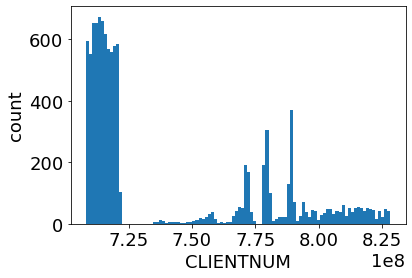

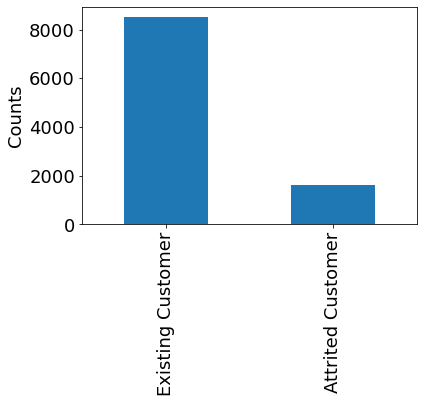

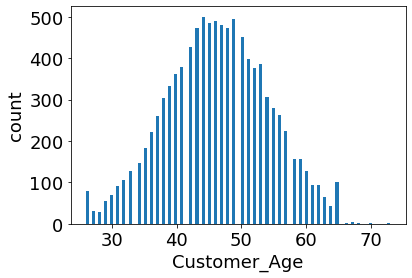

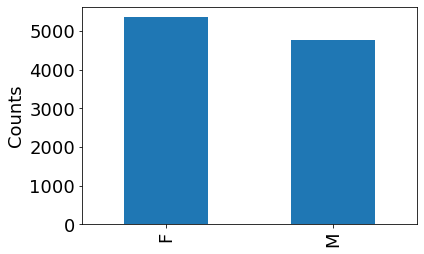

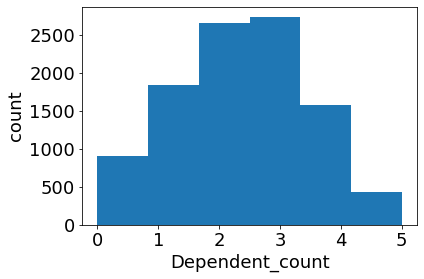

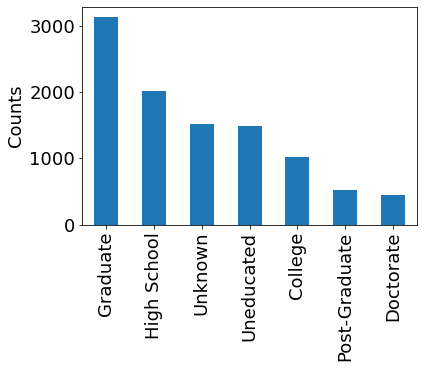

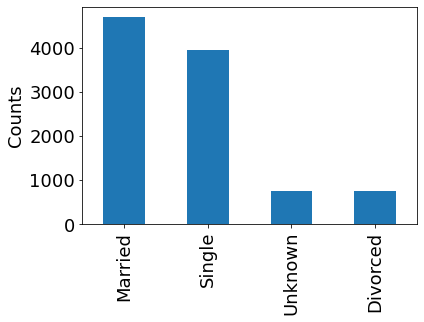

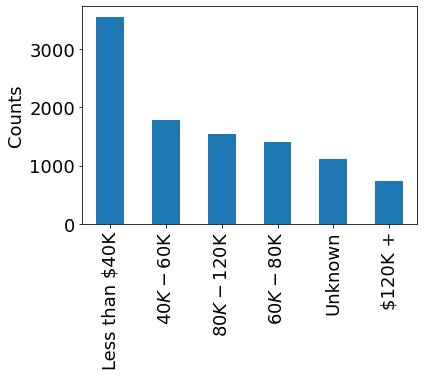

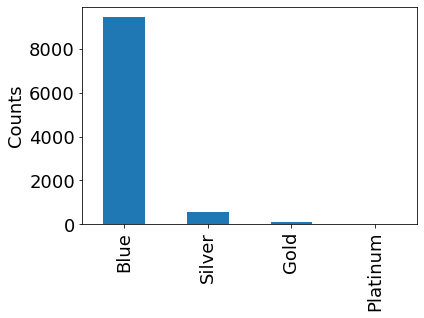

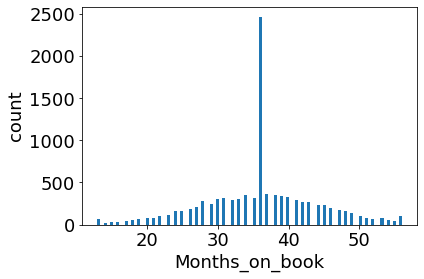

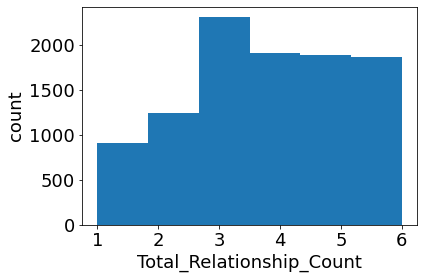

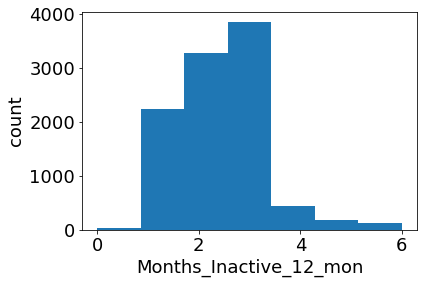

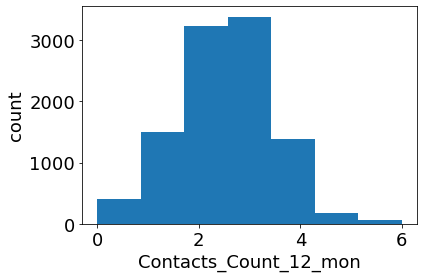

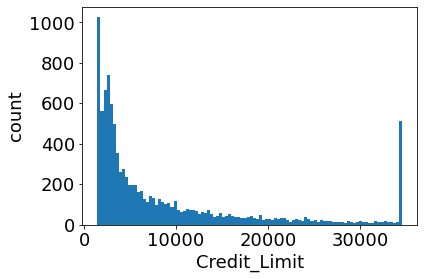

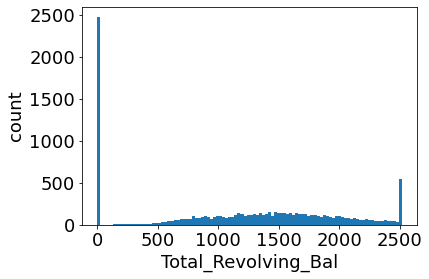

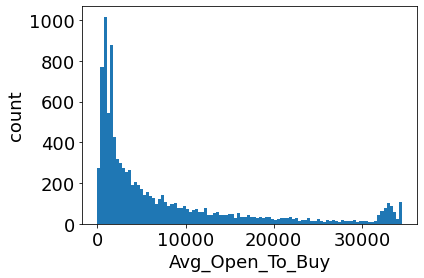

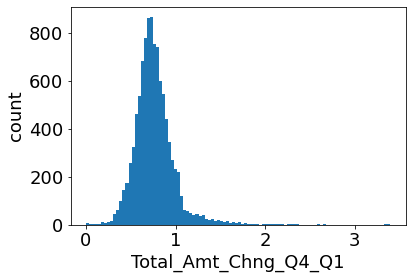

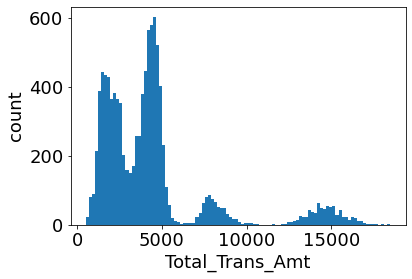

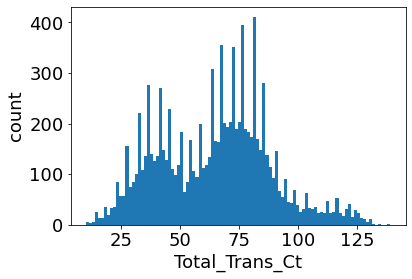

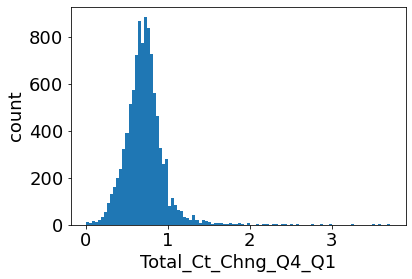

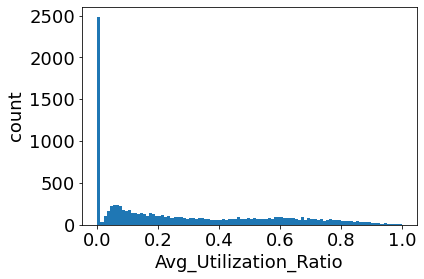

In [71]:
uni_visualization(df)

In [72]:
def visualization(df):
    for column in df.columns.values:
        if df[column].dtypes == "object":
            count_matrix = df.groupby(["Attrition_Flag", column]).size().unstack()
            count_matrix_norm = count_matrix.div(count_matrix.sum(axis = 1), axis = 0)
            count_matrix_norm.plot(kind ='bar', stacked=True)
            plt.ylabel('fraction of people in group')
            plt.title("Proportion of %s for Attrited Customer VS Existing Customer" %column)
            plt.legend(loc = 4)
            plt.savefig('../figures/EDA/{}_Response_plot.png'.format(column))
            plt.show()
        else:
            df[[column, "Attrition_Flag"]].boxplot(by = "Attrition_Flag")
            plt.ylabel(column)
            plt.savefig('../figures/EDA/{}_Response_plot.png'.format(column))
            plt.show()

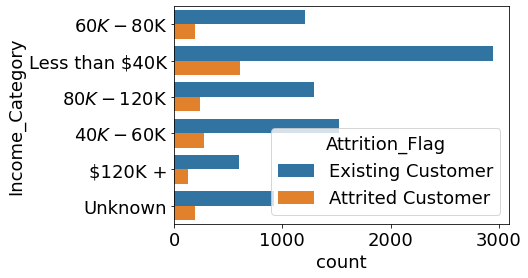

In [73]:
# We don't need to plot the distribution ot the 
ax = sns.countplot(y = "Income_Category", hue = "Attrition_Flag", data=df)


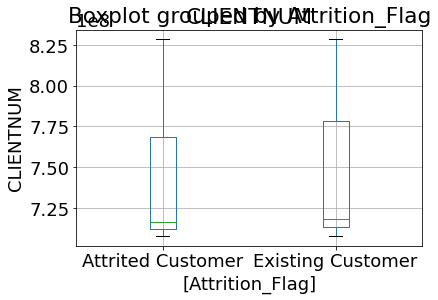

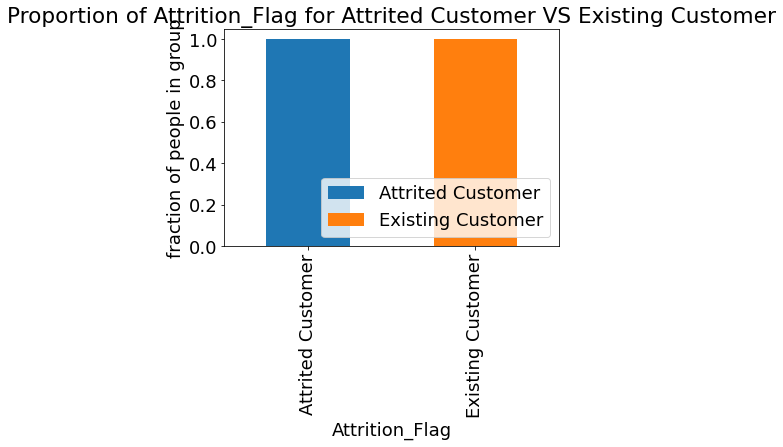

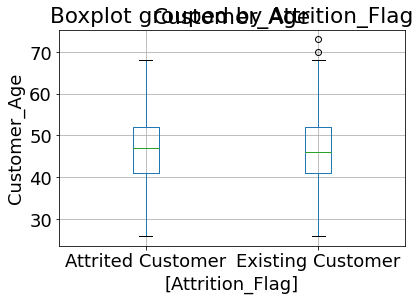

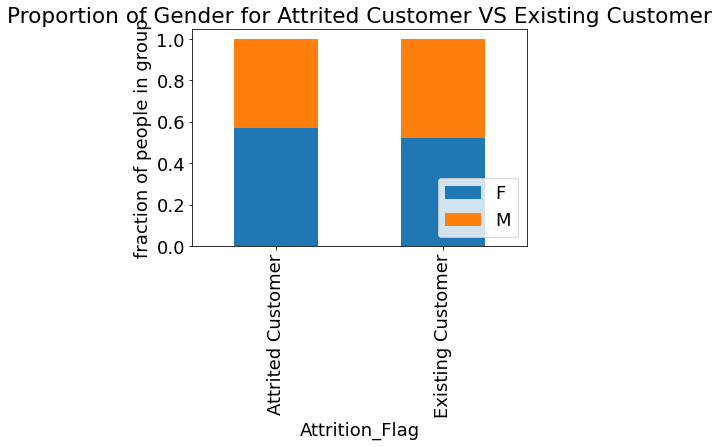

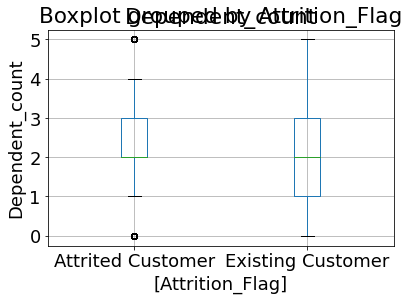

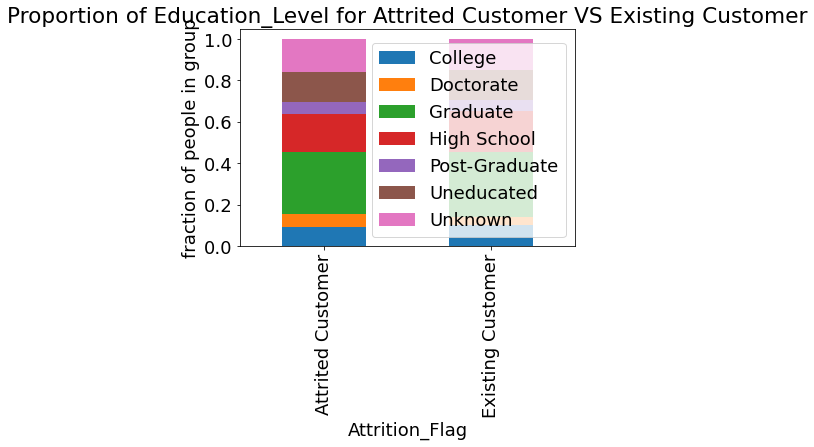

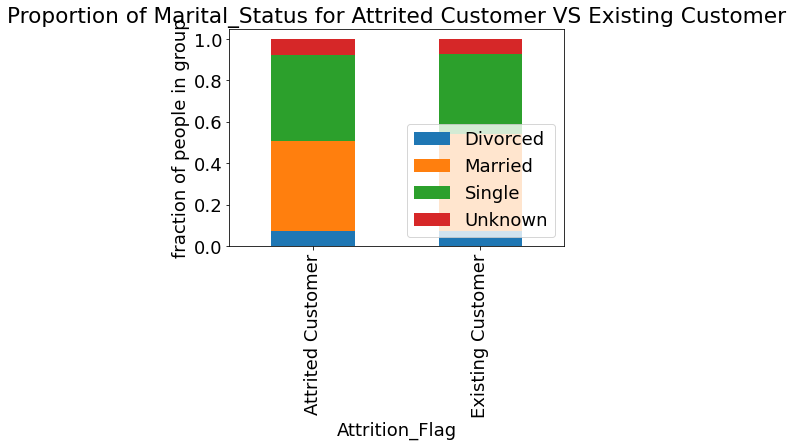

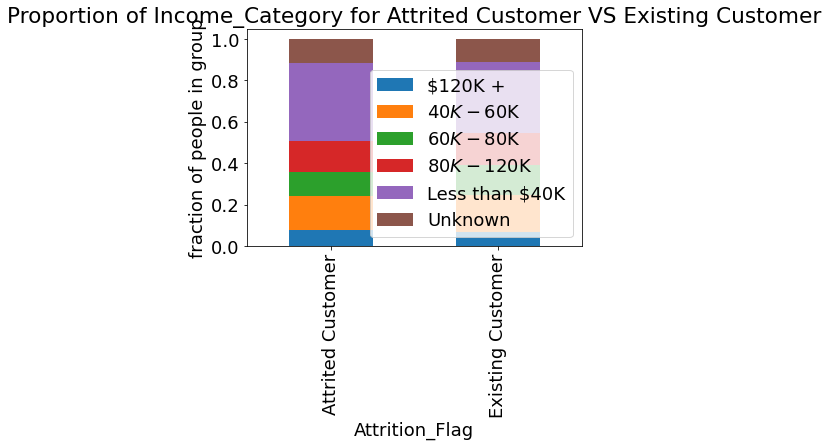

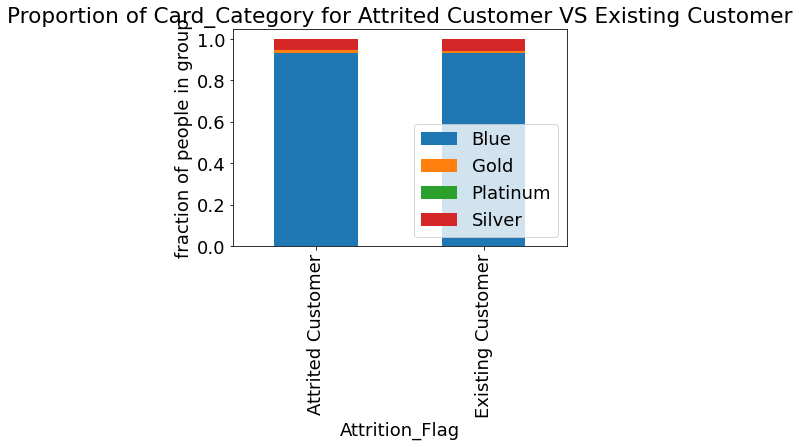

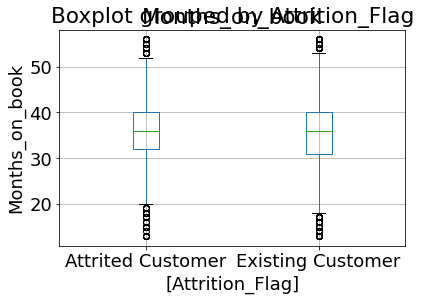

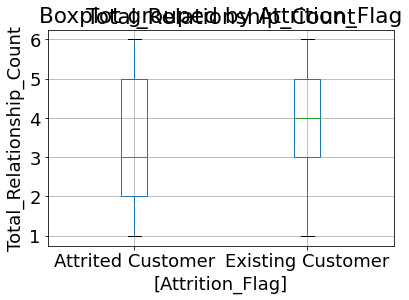

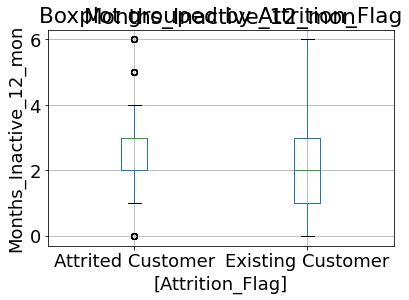

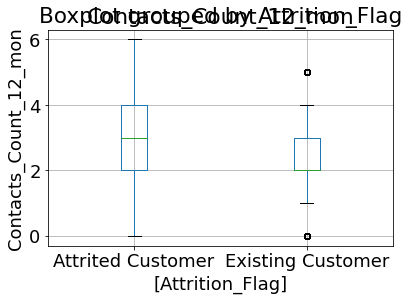

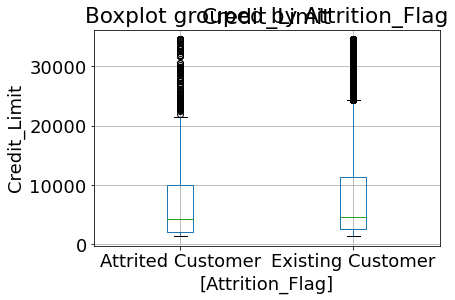

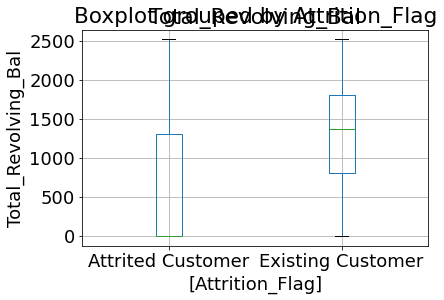

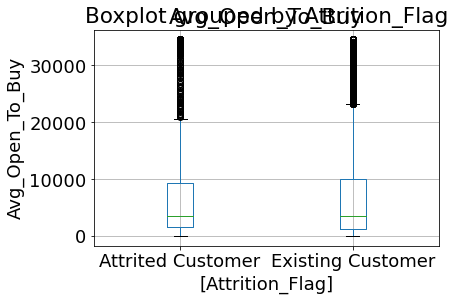

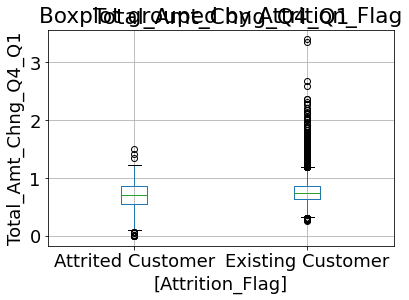

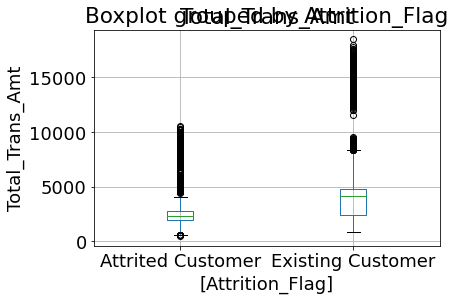

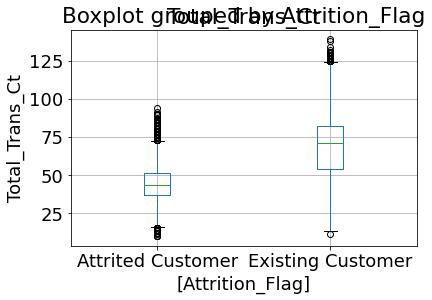

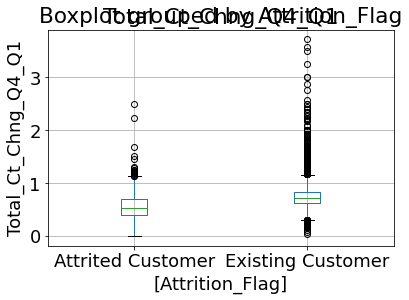

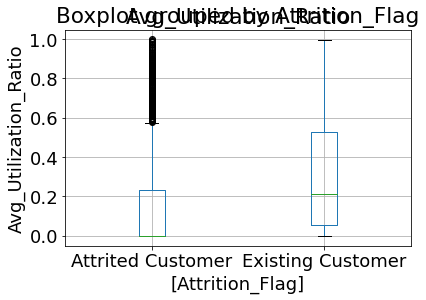

In [74]:
visualization(df)

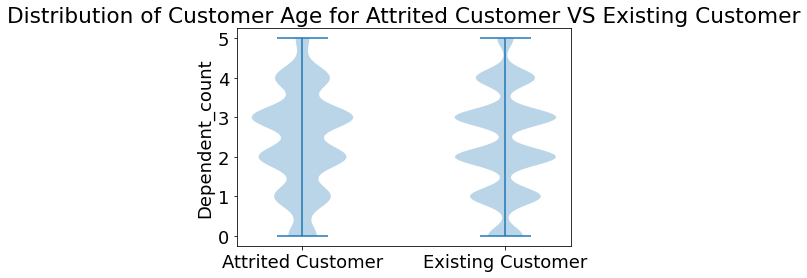

In [75]:
violin_1 = [df[df['Attrition_Flag'] == 'Attrited Customer']['Dependent_count'].values,
           df[df['Attrition_Flag'] == 'Existing Customer']['Dependent_count'].values]

plt.violinplot(dataset = violin_1)
plt.xticks([1,2],['Attrited Customer','Existing Customer'])
plt.ylabel("Dependent_count")
plt.title("Distribution of Customer Age for Attrited Customer VS Existing Customer")
plt.savefig('../figures/EDA/Dep_Cnt_with_Response.png')
plt.show()

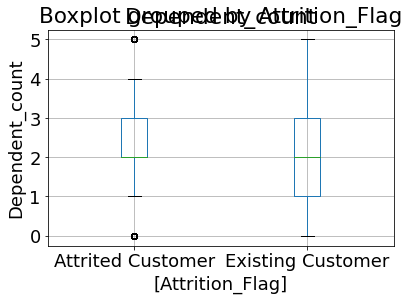

In [76]:
df[["Dependent_count", "Attrition_Flag"]].boxplot(by = "Attrition_Flag")
plt.ylabel("Dependent_count")
plt.savefig('../figures/EDA/Dep_Cnt_with_Response2.png')
plt.show()

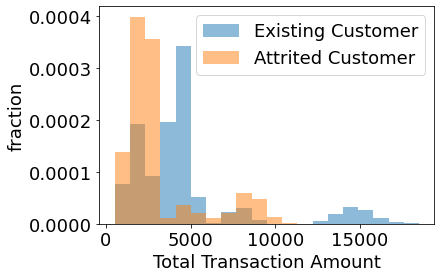

In [77]:
categories = df['Attrition_Flag'].unique()
bin_range = (df['Total_Trans_Amt'].min(),df['Total_Trans_Amt'].max())

for c in categories:
    plt.hist(df[df['Attrition_Flag'] == c]['Total_Trans_Amt'], alpha=0.5, label=c,
             range=bin_range, bins=20, density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('Total Transaction Amount')
plt.savefig('../figures/EDA/Total_Trans_with_Response.png')
plt.show()

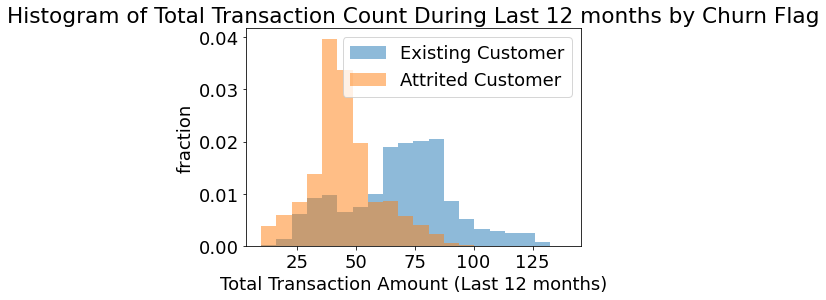

In [78]:
categories = df['Attrition_Flag'].unique()
bin_range = (df['Total_Trans_Ct'].min(),df['Total_Trans_Ct'].max())

for c in categories:
    plt.hist(df[df['Attrition_Flag'] == c]['Total_Trans_Ct'], alpha=0.5, label=c,
             range=bin_range, bins=20, density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('Total Transaction Amount (Last 12 months)')
plt.title("Histogram of Total Transaction Count During Last 12 months by Churn Flag")
plt.savefig('../figures/EDA/Total_Trans_Cnt_with_Response.png')

plt.show()

In [35]:
df_num = df.select_dtypes(exclude ='object')

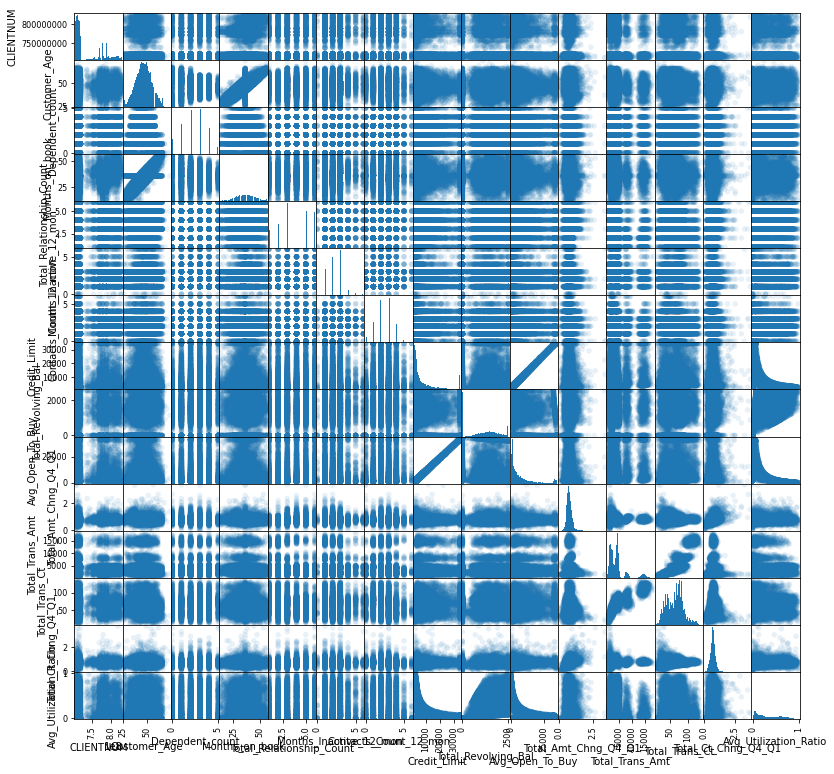

In [36]:
# scatter matrix
plt.rcParams.update({'font.size': 10})
pd.plotting.scatter_matrix(df_num, figsize=(13, 13), 
                           marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.savefig('../figures/EDA/Scatter_Matrix.png')

plt.show()

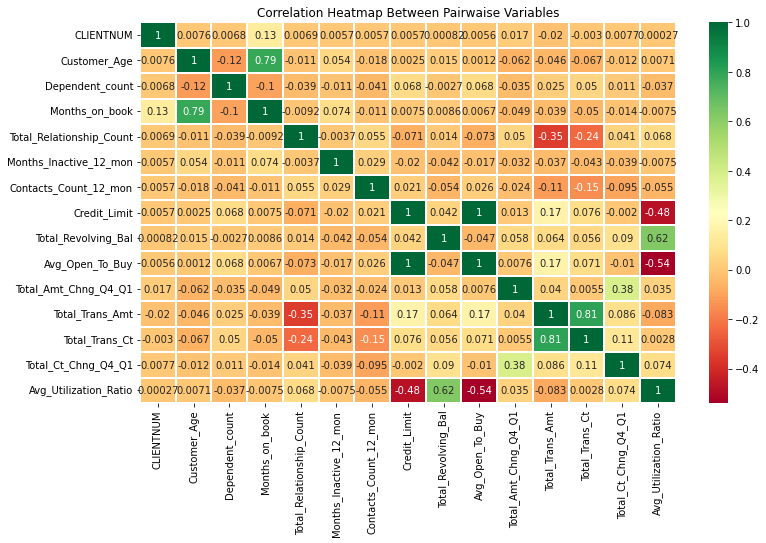

In [37]:
# Correlation Heatmap
corr = df_num.corr()
plt.rcParams.update({'font.size': 10})

# Defining figure size   
# for the output plot  
fig, ax = plt.subplots(figsize = (12, 7)) 
sns.heatmap(corr, cmap ='RdYlGn', linewidths = 0.30, annot = True) 
plt.title("Correlation Heatmap Between Pairwaise Variables")
plt.savefig('../figures/EDA/Correlation_Matrix.png')
plt.show()

### Data Preprocessing 

- Drop the redundant column

In [38]:
# No need to have the `CLIENTNUM` in our df
df.drop(["CLIENTNUM"], axis = 1, inplace = True)

In [39]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


- Splitting the data

In [40]:
# Encoding y to 0 or 1
df['Attrition_Flag'] = df['Attrition_Flag'].map({"Attrited Customer":1, "Existing Customer":0})

In [41]:
df['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [42]:
y = df['Attrition_Flag'] # remember, we want to predict who earns more than 50k or less than 50k
X = df.loc[:, df.columns != 'Attrition_Flag']

- Encoding

In [43]:
df[(df['Income_Category'] == "Unknown") & (df['Education_Level'] == "Unknown")]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
94,0,45,F,3,Unknown,Married,Unknown,Blue,28,5,1,2,2535.0,2440,95.0,1.705,1312,20,1.222,0.963
101,0,41,F,3,Unknown,Married,Unknown,Silver,34,5,3,3,34516.0,2053,32463.0,1.034,1487,26,0.733,0.059
432,0,67,F,0,Unknown,Married,Unknown,Blue,56,4,3,3,10509.0,2388,8121.0,0.777,1365,34,1.429,0.227
498,0,44,M,1,Unknown,Married,Unknown,Blue,34,6,2,0,2885.0,1895,990.0,0.387,1366,31,0.632,0.657
547,0,61,F,1,Unknown,Married,Unknown,Blue,47,4,2,3,1438.3,0,1438.3,1.337,1449,27,1.455,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,1,41,F,4,Unknown,Single,Unknown,Blue,25,2,2,3,29295.0,0,29295.0,1.411,9865,65,0.711,0.000
9792,0,59,F,2,Unknown,Single,Unknown,Blue,46,2,3,2,23731.0,1890,21841.0,0.677,13647,93,0.576,0.080
9893,0,42,F,3,Unknown,Unknown,Unknown,Blue,36,6,1,2,15648.0,0,15648.0,0.731,13784,88,0.913,0.000
9951,1,44,F,3,Unknown,Single,Unknown,Blue,34,2,3,3,26021.0,0,26021.0,1.040,8898,60,0.538,0.000


In [44]:
onehot_ftrs = ['Gender', 'Marital_Status']
minmax_ftrs = ['Customer_Age', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']
ordinal_ftrs = ['Income_Category', 'Education_Level', 'Card_Category']
ordinal_cats = [['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +'],
                ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate'],
                ['Blue', 'Silver', 'Gold', 'Platinum']]
std_ftrs = ['Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Credit_Limit', 
            'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 
            'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [45]:
# Collect all the encoder
preprocessor = ColumnTransformer(remainder='passthrough',
    transformers=[
        ('onehot', OneHotEncoder(sparse = False, handle_unknown = 'ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('std', StandardScaler(), std_ftrs)])


- Preprocessing

In [46]:
# Create 10 different random state
random_state = [1234*i for i in range(1,11)]

In [47]:
def MLpipe_KFold(X, y, preprocessor, ML_algo, param_grid):
       
    test_scores = np.zeros(len(random_state), dtype=np.float64)
    best_models = []
    
    for i in range(len(random_state)):

        # Data Splitting with 4-fold
        X_other, X_test, y_other, y_test = train_test_split(X, y, 
                                                            train_size = 0.8, 
                                                            random_state = random_state[i]) 

        ###########################################################################
        # Making pipeline
        pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                                     ('classifier', ML_algo)])

        # Perform CV
        CV = GridSearchCV(pipeline, param_grid = param_grid, 
                          cv = 4, return_train_score = True,
                          scoring = 'accuracy')

        # Fit the model
        CV.fit(X_other, y_other)

        # Get the best estimator and best parameters
        best_estimator = CV.best_estimator_
        best_params = CV.best_params_

        feature_names = list(CV.best_estimator_[0].named_transformers_['onehot'].get_feature_names(onehot_ftrs)) + \
                        minmax_ftrs + \
                        ordinal_ftrs + \
                        std_ftrs

        test_score = accuracy_score(y_test, CV.predict(X_test))
        test_scores[i] = test_score
        best_models.append(best_estimator) 

    return test_scores, best_models

#### Baseline Model

In [660]:
param_grid = {'classifier__strategy': ['most_frequent']}
ML_algo = DummyClassifier()

In [661]:
scores, models = MLpipe_KFold(X, y, preprocessor, ML_algo, param_grid)

In [662]:
scores

array([0.84254689, 0.83464956, 0.83761106, 0.85241856, 0.84205331,
       0.84007897, 0.84057256, 0.83958539, 0.84007897, 0.84945706])

In [663]:
# Saving model results to file
file = open('results/Baseline_results.save', 'wb')
pickle.dump((scores, models),file)
file.close()

In [664]:
Dummy = DummyClassifier(strategy = 'most_frequent')
# Saving Best Model to file
file = open('results/Baseline_model.save', 'wb')
pickle.dump(Dummy, file)
file.close()

In [665]:
Baseline_scores = scores
Baseline_scores 

array([0.84254689, 0.83464956, 0.83761106, 0.85241856, 0.84205331,
       0.84007897, 0.84057256, 0.83958539, 0.84007897, 0.84945706])

In [666]:
np.mean(Baseline_scores )

0.8419052319842052

#### Lasso

In [402]:
param_grid = {'classifier__penalty': ['l1'], 'classifier__C': [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
              'classifier__solver': ["liblinear"], 'classifier__max_iter': [10000000]} 

ML_algo = LogisticRegression(solver = "liblinear", max_iter=10000000)

In [403]:
scores, models = MLpipe_KFold(X, y, preprocessor, ML_algo, param_grid)

In [404]:
# Saving model results to file
file = open('results/Lasso_results.save', 'wb')
pickle.dump((scores, models),file)
file.close()

In [405]:
data = {"model": [models[i][-1] for i in range(0, 10)], "scores" : scores}
result = pd.DataFrame(data = data)
result

,model,scores
0,"LogisticRegression(max_iter=10000000, penalty=...",0.910168
1,"LogisticRegression(C=100.0, max_iter=10000000,...",0.909181
2,"LogisticRegression(C=10.0, max_iter=10000000, ...",0.906713
3,"LogisticRegression(max_iter=10000000, penalty=...",0.910168
4,"LogisticRegression(max_iter=10000000, penalty=...",0.903258
5,"LogisticRegression(C=10.0, max_iter=10000000, ...",0.904738
6,"LogisticRegression(C=0.1, max_iter=10000000, p...",0.907206
7,"LogisticRegression(C=100.0, max_iter=10000000,...",0.906713
8,"LogisticRegression(max_iter=10000000, penalty=...",0.905726
9,"LogisticRegression(C=1000.0, max_iter=10000000...",0.902270


In [406]:
result["model"] = result["model"].astype(str)
average_performance = result.groupby(["model"]).mean()
average_performance = average_performance.reset_index()
average_performance

,model,scores
0,"LogisticRegression(C=0.1, max_iter=10000000, p...",0.907206
1,"LogisticRegression(C=10.0, max_iter=10000000, ...",0.905726
2,"LogisticRegression(C=100.0, max_iter=10000000,...",0.907947
3,"LogisticRegression(C=1000.0, max_iter=10000000...",0.902270
4,"LogisticRegression(max_iter=10000000, penalty=...",0.907330


In [407]:
Lasso = eval(average_performance.loc[average_performance['scores'].idxmax()][0])

In [408]:
Lasso

LogisticRegression(C=100.0, max_iter=10000000, penalty='l1', solver='liblinear')

In [409]:
# Saving Best Model to file
file = open('results/Lasso_best_model.save', 'wb')
pickle.dump(Logreg,file)
file.close()

#### Ridge

In [396]:
param_grid = {'classifier__penalty': ['l2'], 'classifier__C': [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
              'classifier__solver': ["liblinear"], 'classifier__max_iter': [10000000]} 
ML_algo = LogisticRegression()
scores, models = MLpipe_KFold(X, y, preprocessor, ML_algo, param_grid)

In [397]:
# Saving model results to file
file = open('results/Ridge_results.save', 'wb')
pickle.dump((scores, models),file)
file.close()

In [398]:
data = {"model": [models[i][-1] for i in range(0, 10)], "scores" : scores}
result = pd.DataFrame(data = data)
result

,model,scores
0,"LogisticRegression(max_iter=10000000, solver='...",0.910168
1,"LogisticRegression(C=10.0, max_iter=10000000, ...",0.908193
2,"LogisticRegression(C=10.0, max_iter=10000000, ...",0.907206
3,"LogisticRegression(max_iter=10000000, solver='...",0.910168
4,"LogisticRegression(C=100.0, max_iter=10000000,...",0.903751
5,"LogisticRegression(C=100.0, max_iter=10000000,...",0.904738
6,"LogisticRegression(C=100.0, max_iter=10000000,...",0.906713
7,"LogisticRegression(C=10.0, max_iter=10000000, ...",0.906713
8,"LogisticRegression(C=10.0, max_iter=10000000, ...",0.907206
9,"LogisticRegression(C=1000.0, max_iter=10000000...",0.902270


In [399]:
result["model"] = result["model"].astype(str)
average_performance = result.groupby(["model"]).mean()
average_performance = average_performance.reset_index()
average_performance

,model,scores
0,"LogisticRegression(C=10.0, max_iter=10000000, ...",0.907330
1,"LogisticRegression(C=100.0, max_iter=10000000,...",0.905067
2,"LogisticRegression(C=1000.0, max_iter=10000000...",0.902270
3,"LogisticRegression(max_iter=10000000, solver='...",0.910168


In [400]:
Ridge = eval(average_performance.loc[average_performance['scores'].idxmax()][0])
Ridge

LogisticRegression(max_iter=10000000, solver='liblinear')

In [401]:
# Saving Best Model to file
file = open('results/Ridge_best_model.save', 'wb')
pickle.dump(Ridge,file)
file.close()

#### KNN

In [411]:
param_grid = {'classifier__n_neighbors': [3, 6, 12, 20]}
ML_algo = KNeighborsClassifier()
scores, models = MLpipe_KFold(X, y, preprocessor, ML_algo, param_grid)

In [412]:
# Saving model results to file
file = open('results/KNN_results.save', 'wb')
pickle.dump((scores, models),file)
file.close()

In [413]:
data = {"model": [models[i][-1] for i in range(0, 10)], "scores" : scores}
result = pd.DataFrame(data = data)
result

,model,scores
0,KNeighborsClassifier(n_neighbors=3),0.893880
1,KNeighborsClassifier(n_neighbors=3),0.896841
2,KNeighborsClassifier(n_neighbors=3),0.900296
3,KNeighborsClassifier(n_neighbors=6),0.900296
4,KNeighborsClassifier(n_neighbors=3),0.897335
5,KNeighborsClassifier(n_neighbors=3),0.897335
6,KNeighborsClassifier(n_neighbors=3),0.907700
7,KNeighborsClassifier(n_neighbors=12),0.892892
8,KNeighborsClassifier(n_neighbors=3),0.900790
9,KNeighborsClassifier(n_neighbors=3),0.901777


In [414]:
result["model"] = result["model"].astype(str)
average_performance = result.groupby(["model"]).mean()
average_performance = average_performance.reset_index()
average_performance

,model,scores
0,KNeighborsClassifier(n_neighbors=12),0.892892
1,KNeighborsClassifier(n_neighbors=3),0.899494
2,KNeighborsClassifier(n_neighbors=6),0.900296


In [415]:
KNN = eval(average_performance.loc[average_performance['scores'].idxmax()][0])
KNN

KNeighborsClassifier(n_neighbors=6)

In [416]:
# Saving Best Model to file
file = open('results/KNN_best_model.save', 'wb')
pickle.dump(KNN, file)
file.close()

#### Decision Tree

In [129]:
param_grid = {'classifier__max_depth': [5, 20, 50, 100], 
              'classifier__max_features':[0.5, 0.6, 0.7, 0.8, 0.9]}
ML_algo = DecisionTreeClassifier()

In [130]:
scores, models = MLpipe_KFold(X, y, preprocessor, ML_algo, param_grid)

In [132]:
# Saving model results to file
file = open('results/DT_results.save', 'wb')
pickle.dump((scores, models),file)
file.close()

In [131]:
data = {"model": [models[i][-1] for i in range(0, 10)], "scores" : scores}
result = pd.DataFrame(data = data)
result

,model,scores
0,"DecisionTreeClassifier(max_depth=20, max_featu...",0.941757
1,"DecisionTreeClassifier(max_depth=20, max_featu...",0.941757
2,"DecisionTreeClassifier(max_depth=100, max_feat...",0.944225
3,"DecisionTreeClassifier(max_depth=50, max_featu...",0.940276
4,"DecisionTreeClassifier(max_depth=100, max_feat...",0.931885
5,"DecisionTreeClassifier(max_depth=100, max_feat...",0.937808
6,"DecisionTreeClassifier(max_depth=50, max_featu...",0.933366
7,"DecisionTreeClassifier(max_depth=50, max_featu...",0.946199
8,"DecisionTreeClassifier(max_depth=100, max_feat...",0.942251
9,"DecisionTreeClassifier(max_depth=100, max_feat...",0.932873


In [147]:
result["model"] = result["model"].astype(str)
average_performance = result.groupby(["model"]).mean()
average_performance = average_performance.reset_index()
average_performance

,model,scores
0,"DecisionTreeClassifier(max_depth=100, max_feat...",0.937808
1,"DecisionTreeClassifier(max_depth=100, max_feat...",0.937808
2,"DecisionTreeClassifier(max_depth=20, max_featu...",0.941757
3,"DecisionTreeClassifier(max_depth=20, max_featu...",0.941757
4,"DecisionTreeClassifier(max_depth=50, max_featu...",0.939947


Therefore, accounting for the uncertainties of different random states, the parameters are `max_depth` = 20 and `max_features` = 0.8.

In [162]:
DT = eval(average_performance.loc[average_performance['scores'].idxmax()][0])

In [163]:
DT 

DecisionTreeClassifier(max_depth=20, max_features=0.8)

In [164]:
# Saving Best Model to file
file = open('results/DT_best_model.save', 'wb')
pickle.dump(DT, file)
file.close()

#### Random Forest

In [170]:
param_grid = {'classifier__max_depth': [20, 40, 50], 
              'classifier__max_features':[0.7, 0.8, 0.9]}
ML_algo = RandomForestClassifier()

In [171]:
scores, models = MLpipe_KFold(X, y, preprocessor, ML_algo, param_grid)

In [172]:
# Saving model results to file
file = open('results/RF_results.save', 'wb')
pickle.dump((scores, models), file)
file.close()

In [180]:
file = open('results/RF_results.save', 'rb')
score, model = pickle.load(file)
file.close()

In [222]:
data = {"model": [model[i][-1].__str__() for i in range(0, 10)], "scores" : score}
result = pd.DataFrame(data = data)
result

,model,scores
0,"RandomForestClassifier(max_depth=40, max_featu...",0.968411
1,"RandomForestClassifier(max_depth=40, max_featu...",0.963475
2,"RandomForestClassifier(max_depth=20, max_featu...",0.959526
3,"RandomForestClassifier(max_depth=20, max_featu...",0.961007
4,"RandomForestClassifier(max_depth=40, max_featu...",0.963475
5,"RandomForestClassifier(max_depth=50, max_featu...",0.962488
6,"RandomForestClassifier(max_depth=50, max_featu...",0.962488
7,"RandomForestClassifier(max_depth=40, max_featu...",0.971866
8,"RandomForestClassifier(max_depth=50, max_featu...",0.961500
9,"RandomForestClassifier(max_depth=20, max_featu...",0.960020


In [223]:
average_performance = result.groupby(["model"]).mean()
average_performance = average_performance.reset_index()
average_performance

,model,scores
0,"RandomForestClassifier(max_depth=20, max_featu...",0.961007
1,"RandomForestClassifier(max_depth=20, max_featu...",0.959773
2,"RandomForestClassifier(max_depth=40, max_featu...",0.967670
3,"RandomForestClassifier(max_depth=40, max_featu...",0.963475
4,"RandomForestClassifier(max_depth=40, max_featu...",0.968411
5,"RandomForestClassifier(max_depth=50, max_featu...",0.962159


In [224]:
RF = eval(average_performance.loc[average_performance['scores'].idxmax()][0])

In [225]:
RF

RandomForestClassifier(max_depth=40, max_features=0.9)

In [226]:
# Saving Best Model to file
file = open('results/RF_best_model.save', 'wb')
pickle.dump(RF, file)
file.close()

### Support Vector Machine

In [242]:
param_grid = {'classifier__gamma': [1e-2, 1e-1, 1e0, 1e1, 1e2], 
              'classifier__C':[0.1, 1, 10]}
ML_algo = SVC()

In [243]:
scores, models = MLpipe_KFold(X, y, preprocessor, ML_algo, param_grid)

In [245]:
# Saving model results to file
file = open('results/SVC_results.save', 'wb')
pickle.dump((scores, models), file)
file.close()

In [252]:
data = {"model": [models[i][-1].__str__() for i in range(0, 10)], "scores" : scores}
result = pd.DataFrame(data = data)
result

,model,scores
0,"SVC(C=10, gamma=0.01)",0.927937
1,"SVC(C=10, gamma=0.01)",0.938796
2,"SVC(C=10, gamma=0.01)",0.931392
3,"SVC(C=10, gamma=0.01)",0.938796
4,"SVC(C=10, gamma=0.01)",0.929911
5,"SVC(C=10, gamma=0.01)",0.928924
6,"SVC(C=10, gamma=0.01)",0.939289
7,"SVC(C=10, gamma=0.01)",0.930898
8,"SVC(C=10, gamma=0.1)",0.922014
9,"SVC(C=10, gamma=0.01)",0.926456


In [253]:
average_performance = result.groupby(["model"]).mean()
average_performance = average_performance.reset_index()
average_performance

,model,scores
0,"SVC(C=10, gamma=0.01)",0.932489
1,"SVC(C=10, gamma=0.1)",0.922014


In [254]:
SVC = eval(average_performance.loc[average_performance['scores'].idxmax()][0])
SVC

SVC(C=10, gamma=0.01)

In [255]:
# Saving Best Model to file
file = open('results/SVC_best_model.save', 'wb')
pickle.dump(SVC, file)
file.close()

#### XGB

In [315]:
param_grid = {'classifier__learning_rate': [0.03],
              'classifier__colsample_bytree': [0.9],
              'classifier__subsample': [0.66],
              'classifier__max_depth': [None, 3, 10, 30, 50]}

ML_algo = xgb.XGBClassifier(use_label_encoder = False, eval_metric = 'logloss')

In [316]:
scores, models = MLpipe_KFold(X, y, preprocessor, ML_algo, param_grid)

In [318]:
# Saving model results to file
file = open('results/XGB_results.save', 'wb')
pickle.dump((scores, models), file)
file.close()

In [319]:
data = {"model": [models[i][-1].__str__() for i in range(0, 10)], "scores" : scores}
result = pd.DataFrame(data = data)
result

,model,scores
0,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.970385
1,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.965943
2,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.968411
3,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.965449
4,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.968904
5,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.967917
6,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.972359
7,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.973840
8,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.962981
9,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.965449


In [320]:
average_performance = result.groupby(["model"]).mean()
average_performance = average_performance.reset_index()
average_performance

,model,scores
0,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.969102
1,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.967226


In [344]:
from xgboost import XGBClassifier
from numpy import nan
model = average_performance.loc[average_performance['scores'].idxmax()][0]
model = model.replace("\n", "")
model = model.replace(" ", "")
XGB = eval(model)
XGB

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.03, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.66, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [346]:
XGB = eval(model)

In [347]:
# Saving Best Model to file
file = open('results/XGB_best_model.save', 'wb')
pickle.dump(XGB, file)
file.close()

### Performance Summary

- Model Parameter Choices:

| Model  | Parameter Choices 	|
| -- |--|
| Baseline | **strategy**: most_frequent | 
| Lasso | **C**: 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3 |  
| Ridge | **C**: 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3 |  
| KNN	|**k_neighbors**: 3, 6, 9, 12, 20 |   
| Decision Tree	|  **max_depth** : 5, 20, 50, 100, **max_features**: 0.5, 0.6, 0.7, 0.8, 0.9| 
| Random Forest	|  **max_depth** : 20, 40, 50, **max_features**: 0.7, 0.8, 0.9| 
| SVC	| **gamma** : 1e-2, 1e-1, 1e0, 1e1, 1e2, **C**: 0.1, 1, 10| 
| XGB	| **learning_rate** : 0.03, **colsample_bytree**: 0.9, **subsample**: 0.66, **max_depth**: None, 3, 10, 30, 50|     

In [418]:
def calculate_mean(name):
    file = open(name, 'rb')
    scores, models = pickle.load(file)
    file.close()
    mean_acc = np.mean(scores)
    
    return mean_acc

def calculate_std(name):
    file = open(name, 'rb')
    scores, models = pickle.load(file)
    file.close()
    std_acc = np.std(scores)
    
    return std_acc    

In [421]:
models = ["Lasso", "Ridge", "KNN", "Decision Tree", "Random Forest", "SVC", "XGB"]
acc_means = [calculate_mean("results/Lasso_results.save"), 
             calculate_mean("results/Ridge_results.save"), 
             calculate_mean("results/KNN_results.save"),
             calculate_mean("results/DT_results.save"), 
             calculate_mean("results/RF_results.save"),
             calculate_mean("results/SVC_results.save"), 
             calculate_mean("results/XGB_results.save")]
std_means = [calculate_std("results/Lasso_results.save"), 
             calculate_std("results/Ridge_results.save"), 
             calculate_std("results/KNN_results.save"),
             calculate_std("results/DT_results.save"), 
             calculate_std("results/RF_results.save"),
             calculate_std("results/SVC_results.save"), 
             calculate_std("results/XGB_results.save")]

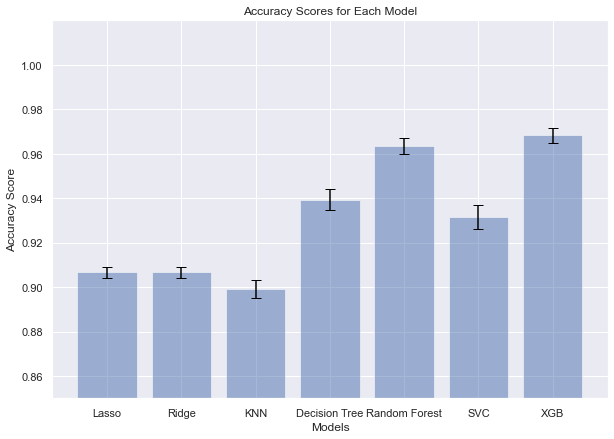

In [492]:
import seaborn as sns 
sns.set(rc={'figure.figsize':(8.7,6.27)})

# Build the plot
fig, ax = plt.subplots()
ax.bar(models, acc_means,
       yerr = std_means,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=5)
ax.set_xlabel("Models")
ax.set_ylabel("Accuracy Score")
ax.set_xticks(models)
ax.set_title('Accuracy Scores for Each Model')
ax.set_ylim(0.85)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('figures/error_bars_for_models.png')
plt.show()


### Final Model Performance

#### Compare to Baseline

In [82]:
file = open('../results/Baseline_results.save', 'rb')
base_score, base_model = pickle.load(file)
file.close()

In [83]:
file = open('../results/XGB_results.save', 'rb')
XGB_score, XGB_model = pickle.load(file)
file.close()

In [84]:
base_mean = np.mean(base_score)
base_std = np.std(base_score)
base_mean, base_std

(0.8419052319842052, 0.005028982849058537)

In [85]:
XGB_mean = np.mean(XGB_score)
XGB_std = np.std(XGB_score)
XGB_mean, XGB_std

(0.9681638696939782, 0.0031930689021985995)

In [86]:
(0.97 - 0.84)/0.05

2.6

In [87]:
(0.97 - 0.84)/0.03

4.333333333333334

#### Best Model Performance

In [102]:
def MLpipe_KFold(X, y, preprocessor, random_state):
    # Data Splitting with 4-fold
    X_other, X_test, y_other, y_test = train_test_split(X, y, 
                                                        train_size = 0.8, 
                                                        random_state = random_state) 

    ###########################################################################
    param_grid = {'classifier__learning_rate': [0.03],
                  'classifier__colsample_bytree': [0.9],
                  'classifier__subsample': [0.66],
                  'classifier__max_depth': [10, 12, 14]}
    
    ML_algo = xgb.XGBClassifier(use_label_encoder = False, eval_metric = 'logloss')
    
    # Making pipeline
    pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                                 ('classifier', ML_algo)])

    # Perform CV
    CV = GridSearchCV(pipeline, param_grid = param_grid, 
                      cv = 4, return_train_score = True,
                      scoring = 'accuracy')

    # Fit the model
    CV.fit(X_other, y_other)

    # Get the best estimator and best parameters
    best_estimator = CV.best_estimator_
    best_params = CV.best_params_

    feature_names = list(CV.best_estimator_[0].named_transformers_['onehot'].get_feature_names(onehot_ftrs)) + \
                    minmax_ftrs + \
                    ordinal_ftrs + \
                    std_ftrs

    return CV, X_test, y_test, feature_names

In [104]:
CV, X_test, y_test, feature_names = MLpipe_KFold(X, y, preprocessor, 1234)

In [107]:
model = CV.best_estimator_[1]

In [108]:
# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.array(classes)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

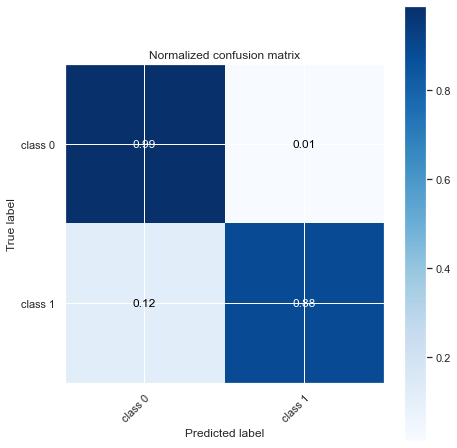

In [109]:
X_test_transformed = CV.best_estimator_[0].transform(X_test)
plot_confusion_matrix(y_test, model.predict(X_test_transformed), classes=['class 0','class 1'], normalize=True)
# Save the figure and show
plt.savefig('../figures/error_bars_for_models.png')
plt.show()

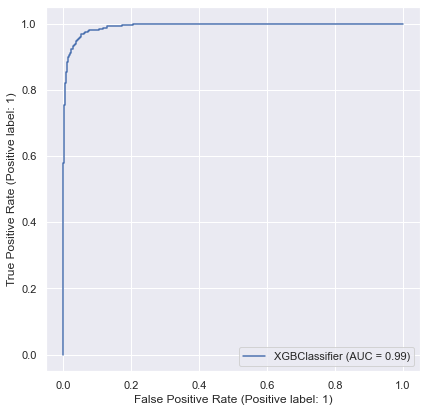

In [110]:
from sklearn.metrics import plot_roc_curve
sns.set(rc={'figure.figsize':(6.7,6.7)})
XGB_ROC = plot_roc_curve(model, X_test_transformed, y_test)

In [111]:
print(classification_report(y_test, model.predict(X_test_transformed)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1707
           1       0.93      0.88      0.90       319

    accuracy                           0.97      2026
   macro avg       0.95      0.93      0.94      2026
weighted avg       0.97      0.97      0.97      2026



### Global Feature Importance

#### Permutation Feature Importance

In [112]:
def MLpipe_KFold(X, y, preprocessor, random_state):
    # Data Splitting with 4-fold
    X_other, X_test, y_other, y_test = train_test_split(X, y, 
                                                        train_size = 0.8, 
                                                        random_state = random_state) 

    ###########################################################################
    param_grid = {'classifier__learning_rate': [0.03],
                  'classifier__colsample_bytree': [0.9],
                  'classifier__subsample': [0.66],
                  'classifier__max_depth': [10, 12, 14]}
    
    ML_algo = xgb.XGBClassifier(use_label_encoder = False, eval_metric = 'logloss')
    
    # Making pipeline
    pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                                 ('classifier', ML_algo)])

    # Perform CV
    CV = GridSearchCV(pipeline, param_grid = param_grid, 
                      cv = 4, return_train_score = True,
                      scoring = 'accuracy')

    # Fit the model
    CV.fit(X_other, y_other)

    # Get the best estimator and best parameters
    best_estimator = CV.best_estimator_
    best_params = CV.best_params_

    feature_names = list(CV.best_estimator_[0].named_transformers_['onehot'].get_feature_names(onehot_ftrs)) + \
                    minmax_ftrs + \
                    ordinal_ftrs + \
                    std_ftrs

    return CV, X_test, y_test, feature_names

In [113]:
CV, X_test, y_test, ftr_names = MLpipe_KFold(X, y, preprocessor, 1234)

In [114]:
# save the output to the file
import pickle
file = open('../results/XGB_for_Global.save', 'wb')
pickle.dump((CV, X_test, y_test, ftr_names),file)
file.close()

In [115]:
file = open('../results/XGB_for_Global.save', 'rb')
CV, X_test, y_test, ftr_names = pickle.load(file)
file.close()

In [116]:
# 10 shuffles
np.random.seed(42)
nr_runs = 10
feature_names = X_test.columns.values
scores = np.zeros([len(feature_names),nr_runs])

test_score = CV.score(X_test,y_test)
print('test score = ',test_score)
print('test baseline = ',np.sum(y_test == 0)/len(y_test))
# loop through the features
for i in range(len(feature_names)):
    print('shuffling '+str(feature_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[feature_names[i]] = np.random.permutation(X_test[feature_names[i]].values)
        acc_scores.append(CV.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.9703849950641659
test baseline =  0.8425468904244817
shuffling Customer_Age
   shuffled test score: 0.965 +/- 0.001
shuffling Gender
   shuffled test score: 0.97 +/- 0.001
shuffling Dependent_count
   shuffled test score: 0.97 +/- 0.0
shuffling Education_Level
   shuffled test score: 0.97 +/- 0.0
shuffling Marital_Status
   shuffled test score: 0.971 +/- 0.001
shuffling Income_Category
   shuffled test score: 0.971 +/- 0.0
shuffling Card_Category
   shuffled test score: 0.97 +/- 0.0
shuffling Months_on_book
   shuffled test score: 0.97 +/- 0.001
shuffling Total_Relationship_Count
   shuffled test score: 0.938 +/- 0.003
shuffling Months_Inactive_12_mon
   shuffled test score: 0.968 +/- 0.001
shuffling Contacts_Count_12_mon
   shuffled test score: 0.971 +/- 0.001
shuffling Credit_Limit
   shuffled test score: 0.969 +/- 0.001
shuffling Total_Revolving_Bal
   shuffled test score: 0.953 +/- 0.003
shuffling Avg_Open_To_Buy
   shuffled test score: 0.969 +/- 0.001
shuffling Tot

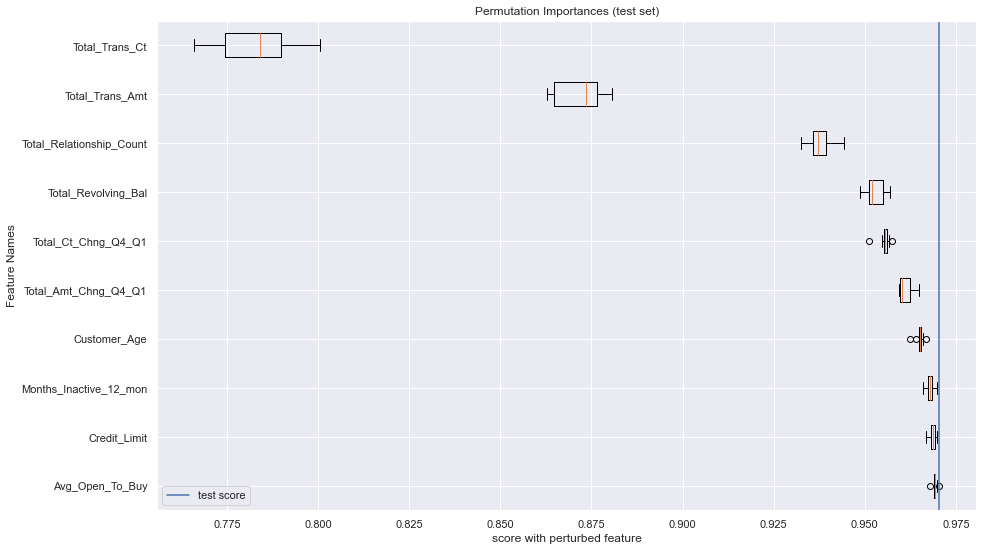

In [117]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1][9:]
plt.rcParams.update({'font.size': 18})
plt.figure(figsize = (14, 8))
plt.boxplot(scores[sorted_indcs].T,labels = feature_names[sorted_indcs], vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.ylabel("Feature Names")
plt.legend()
plt.tight_layout()
plt.savefig('../figures/Permutation_Importance.png')
plt.show()

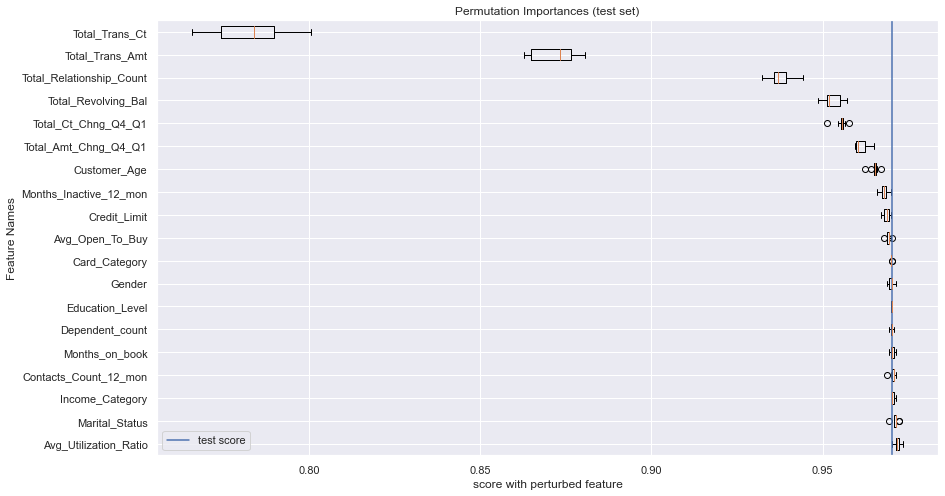

In [119]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 18})
plt.figure(figsize = (14, 8))
plt.boxplot(scores[sorted_indcs].T,labels = feature_names[sorted_indcs], vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.ylabel("Feature Names")
plt.legend()
plt.savefig('../figures/Permutation_Importance_Top10.png')
plt.show()

#### Built-in Feature Importance:

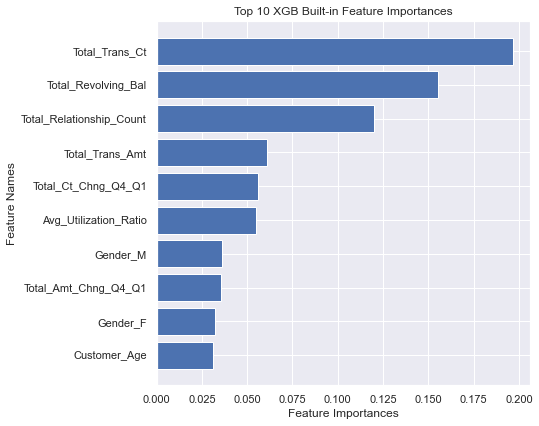

In [123]:
# First, sort the index
sorted_idx = model.feature_importances_.argsort()
plt.barh(np.array(ftr_names)[sorted_idx][13:], model.feature_importances_[sorted_idx][13:])
plt.title("Top 10 XGB Built-in Feature Importances")
plt.xlabel("Feature Importances")
plt.ylabel("Feature Names")
# Save the figure and show
plt.savefig('../figures/XGB_Builtin_Importance_Top10.png')
plt.show()

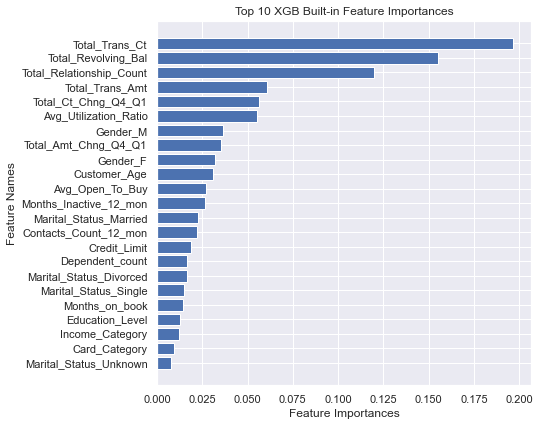

In [124]:
# First, sort the index
sorted_idx = model.feature_importances_.argsort()
plt.barh(np.array(ftr_names)[sorted_idx], model.feature_importances_[sorted_idx])
plt.title("Top 10 XGB Built-in Feature Importances")
plt.xlabel("Feature Importances")
plt.ylabel("Feature Names")
plt.savefig('../figures/XGB_Builtin_Importance.png')
plt.show()

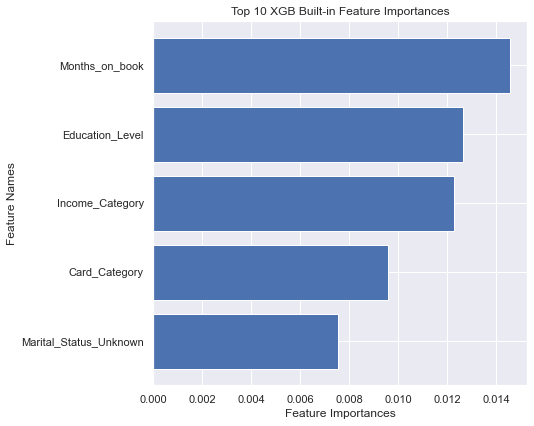

In [125]:
# First, sort the index
sorted_idx = model.feature_importances_.argsort()
plt.barh(np.array(ftr_names)[sorted_idx][:5], model.feature_importances_[sorted_idx][:5])
plt.title("Top 10 XGB Built-in Feature Importances")
plt.xlabel("Feature Importances")
plt.ylabel("Feature Names")
plt.savefig('../figures/XGB_Builtin_Importance_Last5.png')
plt.show()

#### SHAP Value

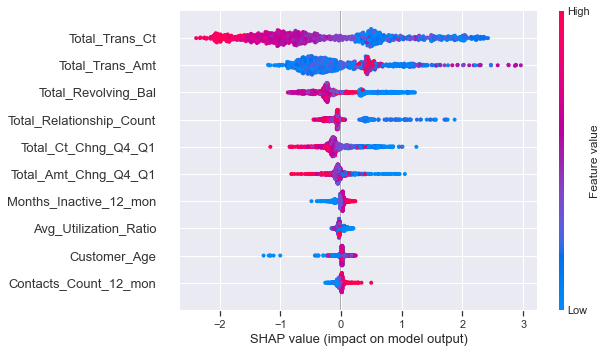

In [671]:
shap.summary_plot(shap_values, X_test_transformed[:1000], feature_names = ftr_names, max_display = 10)

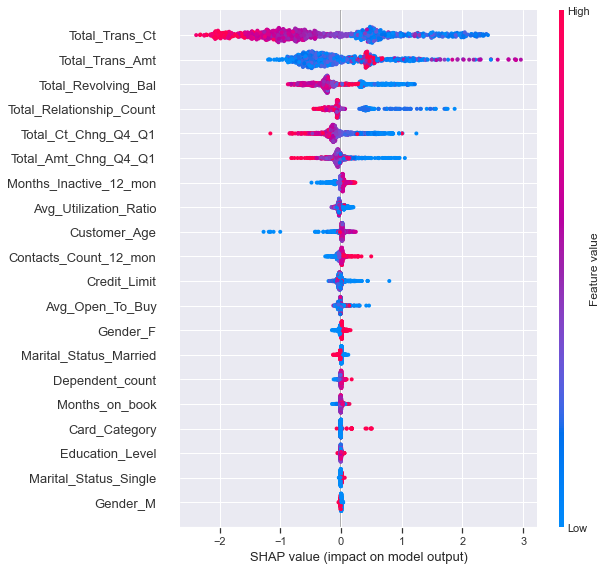

In [716]:
shap.summary_plot(shap_values, X_test_transformed[:1000], feature_names = ftr_names)

#### SHAP value for local featuer importance

In [613]:
import shap
shap.initjs() # required for visualizations later on

# create the explainer object with the random forest model
explainer = shap.TreeExplainer(model)

# transform the test set
X_test_transformed = CV.best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))

# calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(X_test_transformed[:1000])
print(np.shape(shap_values))

(2026, 23)
(1000, 23)


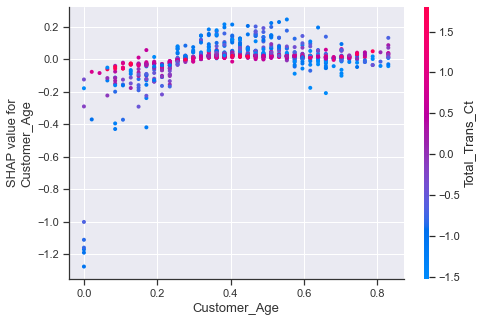

In [614]:
ftr = 'Customer_Age'
shap.dependence_plot(ftr, shap_values, X_test_transformed[:1000], feature_names = ftr_names)

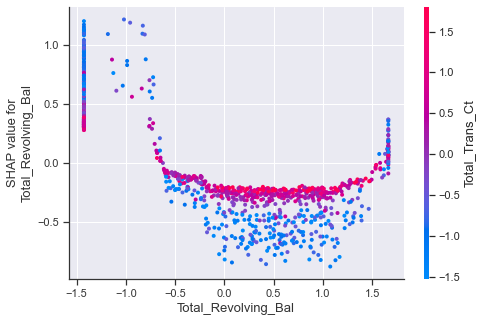

In [721]:
ftr = 'Total_Revolving_Bal'
shap.dependence_plot(ftr, shap_values, X_test_transformed[:1000], feature_names = ftr_names)

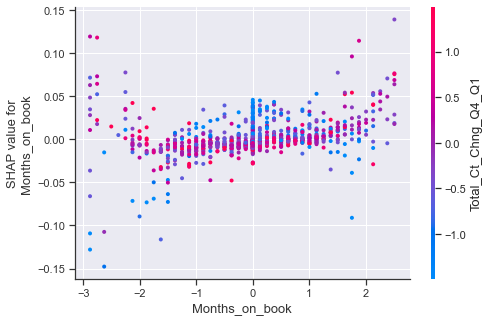

In [748]:
ftr = 'Months_on_book'
shap.dependence_plot(ftr, shap_values, X_test_transformed[:1000], feature_names = ftr_names)